In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Image Segmentation Experiential Learning


# Introduction

Image segmentation is a critical process in computer vision that involves partitioning an image into multiple segments or regions, each corresponding to distinct objects or parts of objects. This technique plays a pivotal role in various applications, including medical imaging, autonomous vehicles, object recognition, and augmented reality. In this project, we will focus on segmenting cat images to accurately identify and separate cats from their backgrounds. This project could potentially contribute to improving pet detection systems, cat breed classification, or even animal behavior analysis.

# Literature Review:
## Common methods used for Image segmentation

- Thresholding: Setting a fixed threshold value to divide the image into binary regions based on pixel intensity or color.
- Region-based segmentation: Grouping pixels with similar characteristics into regions using techniques like region growing or region merging.
- Edge-based segmentation: Detecting edges or boundaries in the image and separating different objects based on these edges.
- Clustering: Using clustering algorithms like k-means or mean-shift to group pixels with similar features into segments.
- Watershed segmentation: Treating the image as a topographic landscape and flooding it from markers to create distinct regions.
- Deep learning-based segmentation: Utilizing convolutional neural networks (CNNs) and deep learning techniques to learn complex representations for segmentation tasks. Popular architectures for this include U-Net, SegNet, and DeepLab.
- Markov Random Fields (MRFs) and Conditional Random Fields (CRFs): MRFs and CRFs are probabilistic graphical models used in image segmentation to model the spatial relationships between pixels. They help incorporate contextual information and smoothness constraints into the segmentation process.



## Why image segmentation in computer vision?
Image segmentation is essential for several reasons:

- Semantic understanding: Segmentation provides a more detailed and structured understanding of the content in an image. By labeling each region with a specific class or category, computer vision systems can gain a better grasp of the scene’s semantics and context.
- Object recognition and detection: Image segmentation enables the identification and localization of objects within an image. Once an image is divided into segments, individual objects can be extracted and analyzed separately, making it easier to recognize and detect objects in complex scenes.
- Instance segmentation: In addition to classifying objects, image segmentation can also differentiate between multiple instances of the same object. This level of granularity is crucial in scenarios where there are multiple objects of the same type in an image, such as counting or tracking objects.
- Object tracking: Segmentation helps in tracking objects across frames in videos. By consistently segmenting the objects in each frame, their trajectories and movements can be analyzed over time.
- Scene understanding: For tasks like autonomous driving, scene understanding is crucial. Image segmentation can assist in identifying road boundaries, lane markings, pedestrians, and other vehicles, enabling the development of safer and more reliable autonomous systems.
- Image editing and manipulation: Segmentation allows the modification of specific regions within an image selectively. For example, it can be used to remove unwanted objects, change the background, or apply specific filters or effects only to certain regions.
- Medical imaging: In medical applications, image segmentation is used for various purposes, such as tumor detection, organ segmentation, and cell analysis, aiding in disease diagnosis and treatment planning.
- Image compression: Segmentation can help optimize image compression techniques by focusing more on preserving the important segments while reducing the complexity of less critical regions.

# Dataset Exploration:

## About Dataset
The Oxford-IIIT Pet Dataset is a 37 category pet dataset with roughly 200 images for each class created by the Visual Geometry Group at Oxford. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

### Annotation Examples

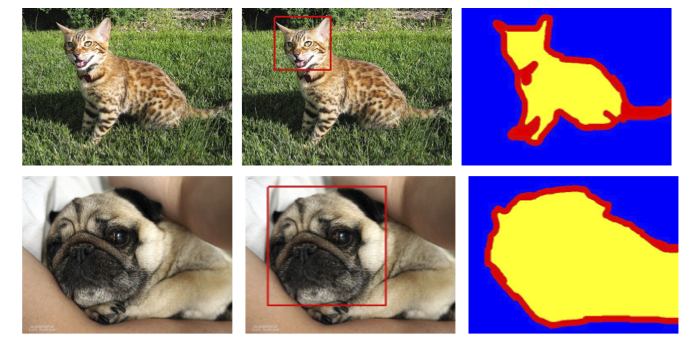

The following annotations are available for every image in the dataset: (a) species and breed name; (b) a tight bounding box (ROI) around the head of the animal; and (c) a pixel level foreground-background segmentation (Trimap).

Citation
[O. M. Parkhi et al., 2012](https://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf)



# Hands-on Basic Image Processing:


In [2]:
image_path = r"/content/drive/Othercomputers/astRo/SIT/TY - S2/CV/ImageSeg/Abyssinian_1.jpg"


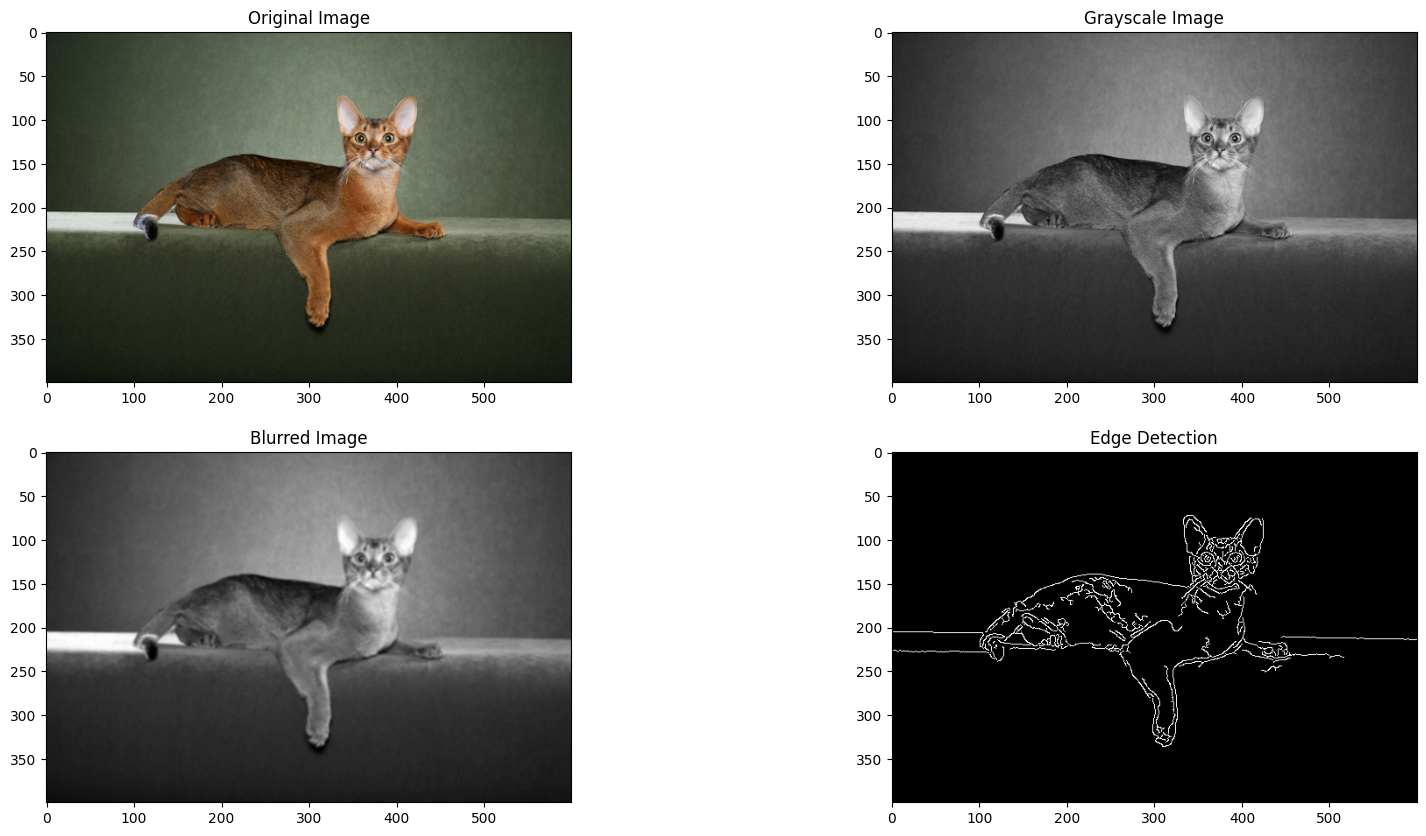

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform edge detection
edges = cv2.Canny(blurred_image, 30, 100)

# Display the images
plt.figure(figsize=(20, 10))

plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(222), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(223), plt.imshow(blurred_image, cmap='gray'), plt.title('Blurred Image')
plt.subplot(224), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')

plt.show()

# Thresholding Techniques:
## Different Thresholding Techniques
- Binary Thresholding
- Binary Inverse Thresholding
- Truncated Thresholding
- To Zero Thresholding
- To Zero Inverse Thresholding  
- Otsu's Thresholding
- Adaptive Thresholding





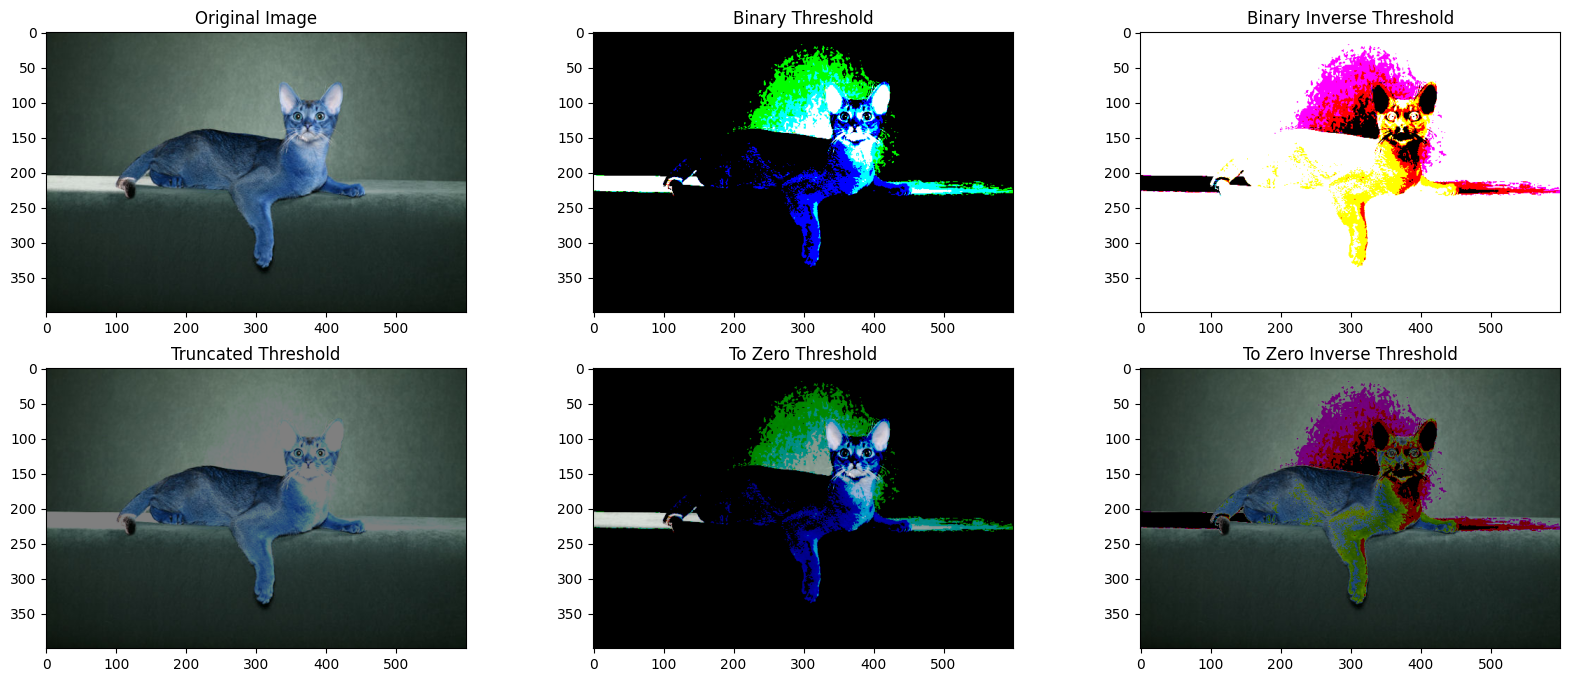

In [4]:
# Apply different thresholding techniques
_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
_, binary_inv_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
_, trunc_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
_, tozero_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
_, tozero_inv_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

# Display the results
plt.figure(figsize=(20, 8))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(binary_thresh, cmap='gray'), plt.title('Binary Threshold')
plt.subplot(233), plt.imshow(binary_inv_thresh, cmap='gray'), plt.title('Binary Inverse Threshold')
plt.subplot(234), plt.imshow(trunc_thresh, cmap='gray'), plt.title('Truncated Threshold')
plt.subplot(235), plt.imshow(tozero_thresh, cmap='gray'), plt.title('To Zero Threshold')
plt.subplot(236), plt.imshow(tozero_inv_thresh, cmap='gray'), plt.title('To Zero Inverse Threshold')

plt.show()

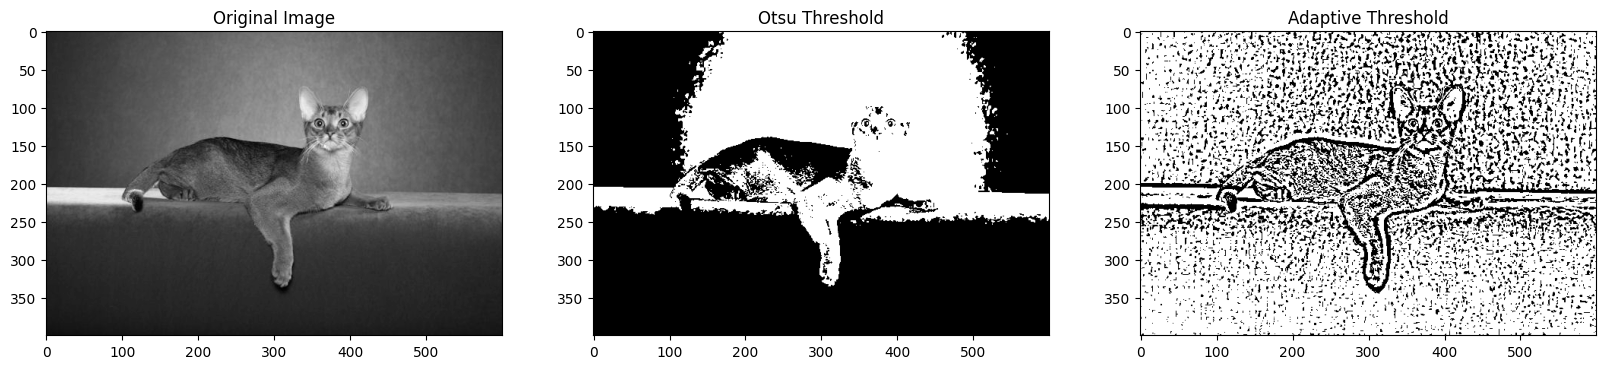

In [5]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply Adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the results
plt.figure(figsize=(20, 20))

plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(otsu_thresh, cmap='gray'), plt.title('Otsu Threshold')
plt.subplot(133), plt.imshow(adaptive_thresh, cmap='gray'), plt.title('Adaptive Threshold')

plt.show()

# Clustering Algorithms:

   - Apply clustering algorithms (e.g., K-means, DBSCAN) to segment
images from your dataset. Evaluate the effectiveness of each algorithm.



In [ ]:
!pip install ipympl


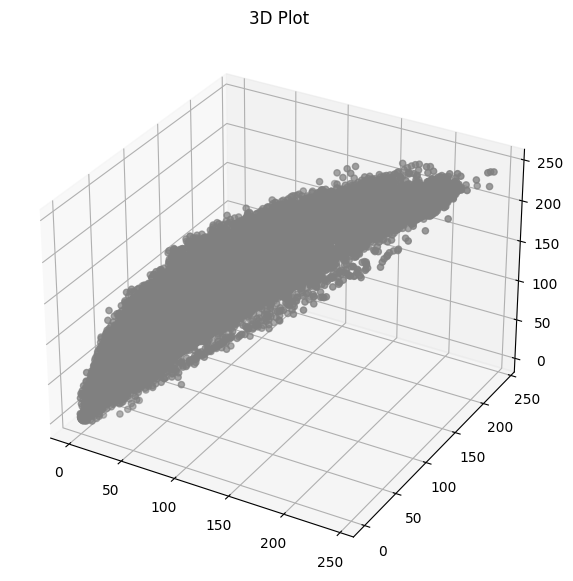

In [7]:
from mpl_toolkits.mplot3d import Axes3D

image = cv2.imread(image_path)
r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(r, g, b, c='0.5')
ax.set_title('3D Plot')
plt.show()

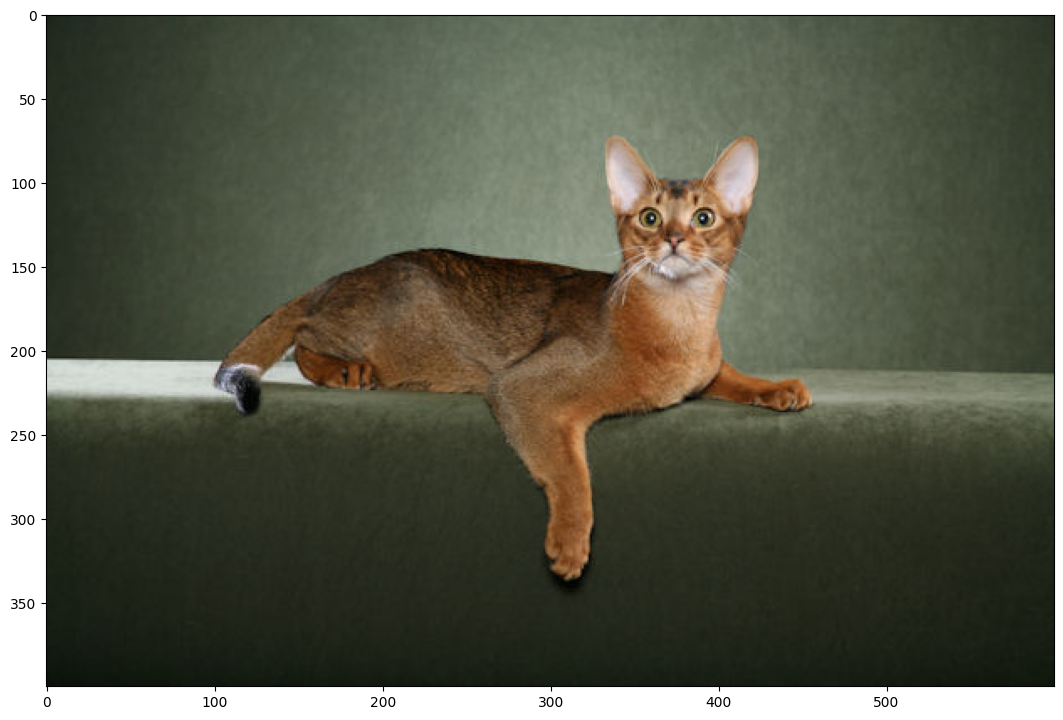

In [8]:
img = cv2.imread(image_path)
img=cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,10))
plt.imshow(img)

In [9]:
img.shape #the first is height, the second is width and the third is the color channel of the image

(400, 600, 3)

In [10]:
#Next, converts the HxWx3 image into a Kx3 matrix where K=HxW and each row is now a vector in the 3-D space of RGB.
vectorized_img = img.reshape((-1,3))
vectorized_img.shape

(240000, 3)

In [11]:
import numpy as np
vectorized_img= np.float32(vectorized_img)
vectorized_img

array([[30., 38., 27.],
       [30., 38., 27.],
       [30., 38., 27.],
       ...,
       [15., 23., 12.],
       [15., 23., 12.],
       [15., 23., 12.]], dtype=float32)

In [12]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [13]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [14]:
center = np.uint8(center)
center

array([[152, 150, 129],
       [ 43,  47,  33],
       [ 96,  96,  74]], dtype=uint8)

In [15]:
#Next, we have to access the labels to regenerate the clustered image
res = center[label.flatten()]
result_image = res.reshape((img.shape))

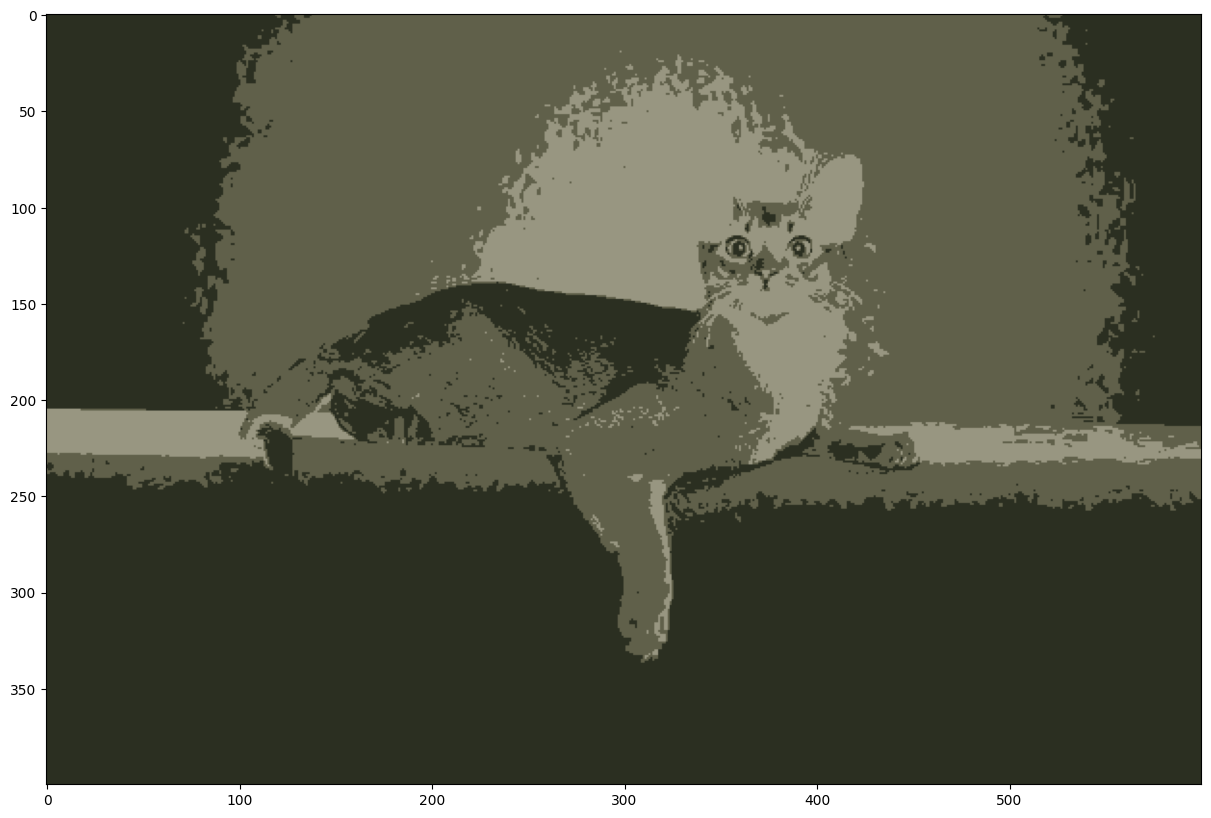

In [16]:
plt.figure(figsize=(15,10))
plt.imshow(result_image)

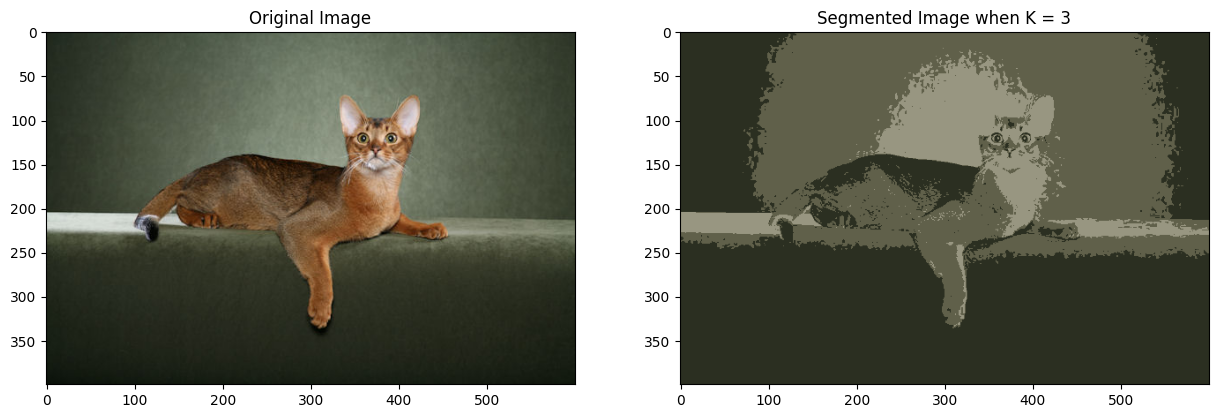

In [17]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K)
plt.show()

# Deep Learning Model:

   - Choose a pre-trained deep learning model (e.g., U-Net, DeepLab)
and apply it to your dataset. Share the model, code, and results.
Discuss the strengths and limitations of deep learning in image
segmentation.



In [18]:
!pip install git+https://github.com/tensorflow/examples.git


  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-7j982qrl
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-7j982qrl
  Resolved https://github.com/tensorflow/examples.git to commit fff4bcda7201645a1efaea4534403daf5fc03d42
  Preparing metadata (setup.py) ... done


In [19]:
import tensorflow as tf

import tensorflow_datasets as tfds

In [20]:
from tensorflow_examples.models.pix2pix import pix2pix

from IPython.display import clear_output
import matplotlib.pyplot as plt

## Load the Oxford-IIIT Pets dataset

In [21]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)


In [22]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

def load_image(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(
    datapoint['segmentation_mask'],
    (128, 128),
    method = tf.image.ResizeMethod.NEAREST_NEIGHBOR,
  )

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [23]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train_images = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_images = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

The following class performs a simple augmentation by randomly-flipping an image.

In [24]:
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels

Build the input pipeline, applying the augmentation after batching the inputs:

In [25]:
train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

test_batches = test_images.batch(BATCH_SIZE)

Visualize an image example and its corresponding mask from the dataset

In [26]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

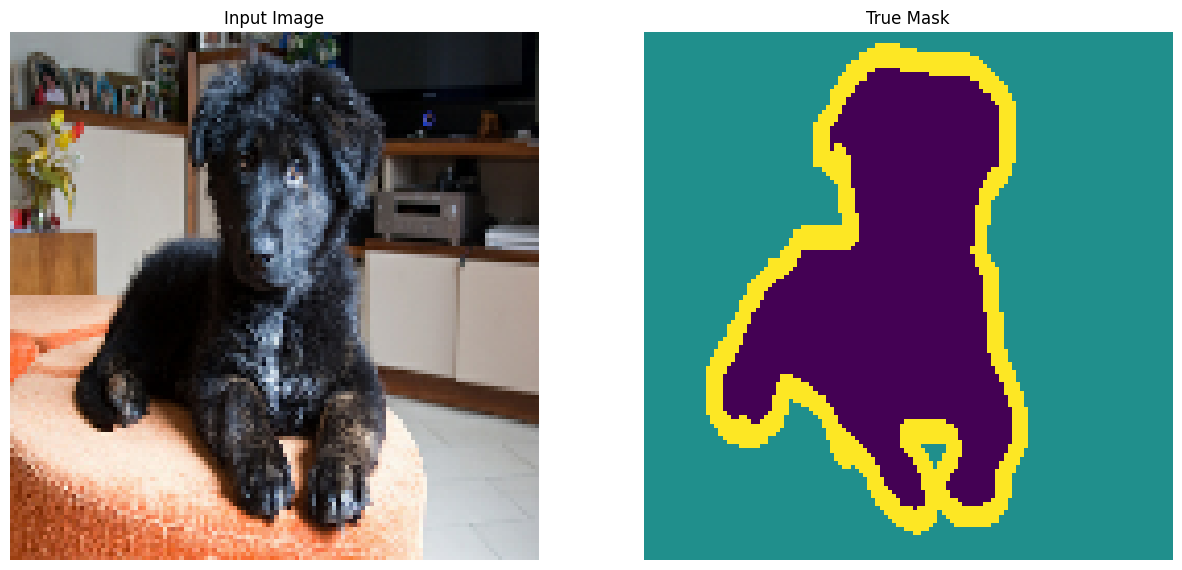

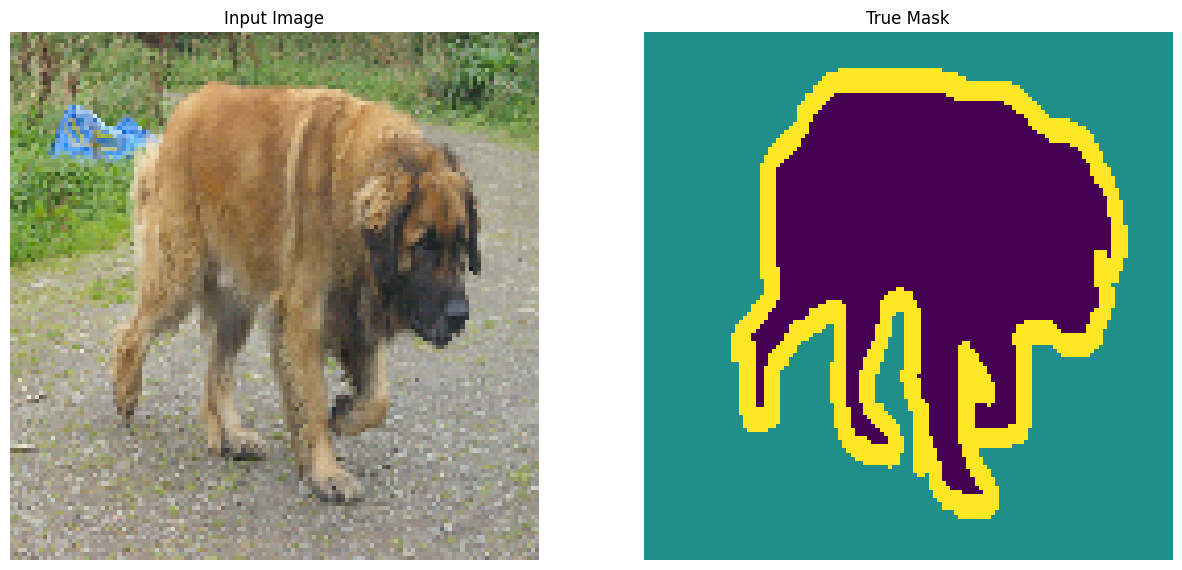

In [27]:
for images, masks in train_batches.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask])

## Define the model
The model being used here is a modified [U-Net](https://arxiv.org/abs/1505.04597). A U-Net consists of an encoder (downsampler) and decoder (upsampler). To learn robust features and reduce the number of trainable parameters, use a pretrained model—[MobileNetV2](https://arxiv.org/abs/1801.04381)—as the encoder. For the decoder, we will use the upsample block, which is already implemented in the [pix2pix](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py) example in the TensorFlow Examples repo.


As mentioned, the encoder is a pretrained MobileNetV2 model. You will use the model from `tf.keras.applications`. The encoder consists of specific outputs from intermediate layers in the model. Note that the encoder will not be trained during the training process.

In [28]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


The decoder/upsampler is simply a series of upsample block.

In [29]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [30]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

Note that the number of filters on the last layer is set to the number of `output_channels`. This will be one output channel per class.

## Train the model

Now, all that is left to do is to compile and train the model.

Since this is a multiclass classification problem, use the `tf.keras.losses.SparseCategoricalCrossentropy` loss function with the `from_logits` argument set to `True`, since the labels are scalar integers instead of vectors of scores for each pixel of every class.

When running inference, the label assigned to the pixel is the channel with the highest value. This is what the `create_mask` function is doing.

In [31]:
OUTPUT_CLASSES = 3

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Plot the resulting model architecture:

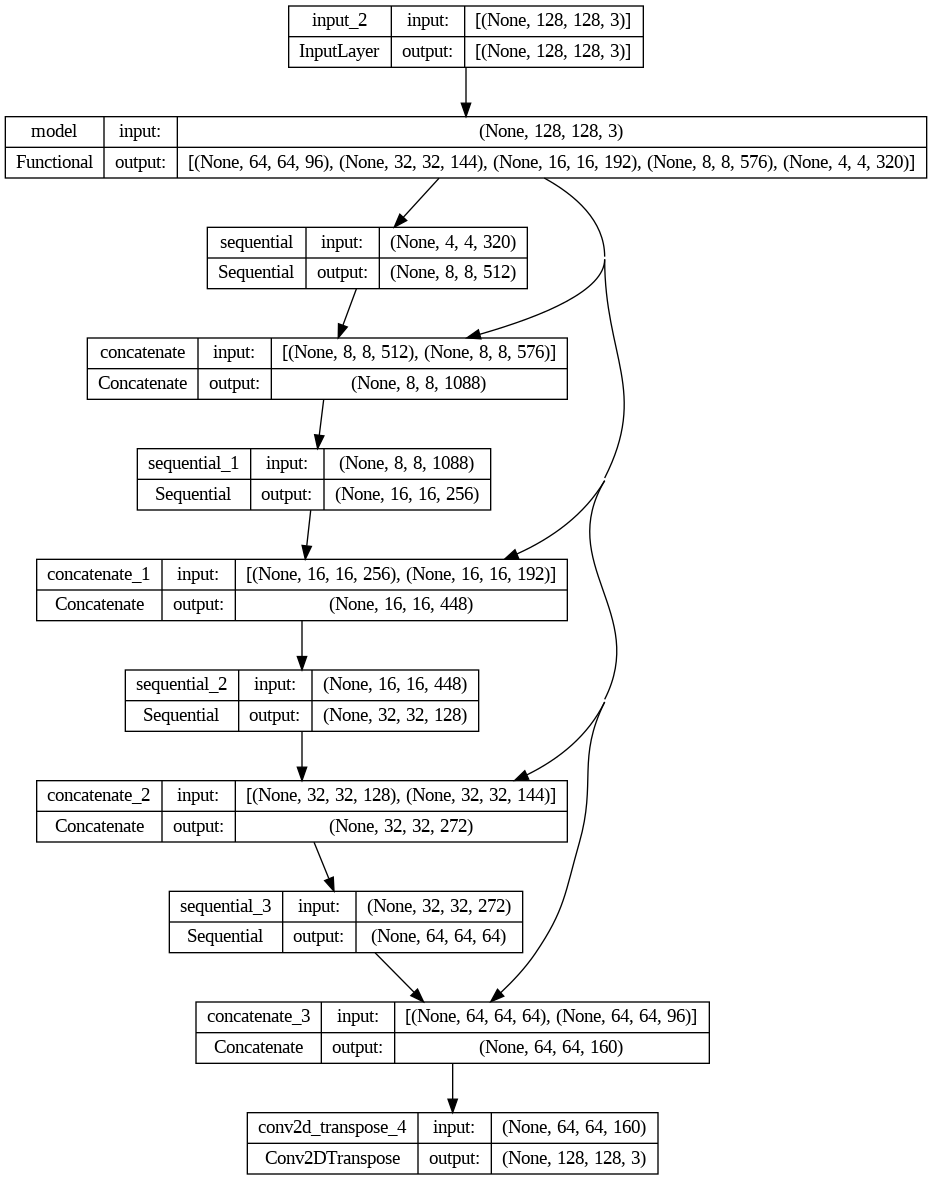

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [33]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [34]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

1/1 [==============================] - 5s 5s/step


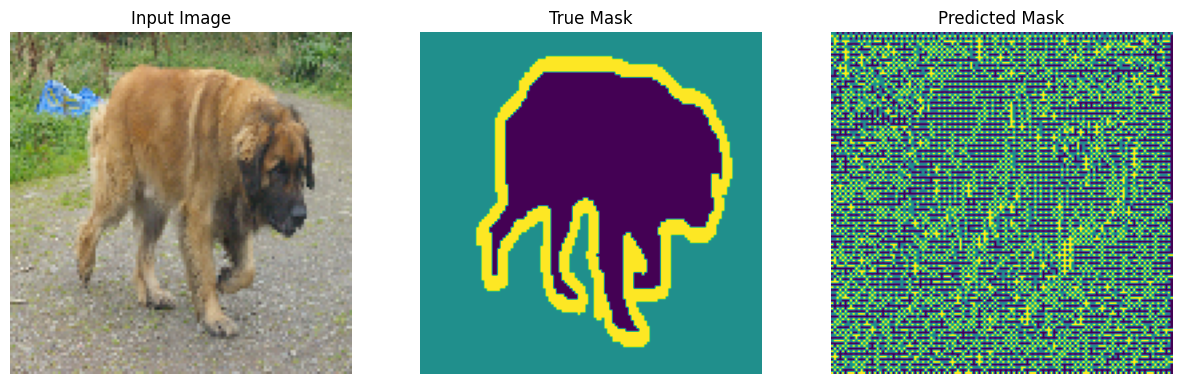

In [35]:
show_predictions()

The callback defined below is used to observe how the model improves while it is training:

In [36]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [37]:
import tensorflow as tf
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [42]:
EPOCHS = 50
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_batches, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_batches)

Epoch 1/50
57/57 [==============================] - 9s 163ms/step - loss: 0.1584 - accuracy: 0.9350 - val_loss: 0.2840 - val_accuracy: 0.9055
Epoch 2/50
57/57 [==============================] - 9s 151ms/step - loss: 0.1537 - accuracy: 0.9367 - val_loss: 0.2817 - val_accuracy: 0.9052
Epoch 3/50
57/57 [==============================] - 12s 210ms/step - loss: 0.1510 - accuracy: 0.9378 - val_loss: 0.2868 - val_accuracy: 0.9045
Epoch 4/50
57/57 [==============================] - 9s 162ms/step - loss: 0.1479 - accuracy: 0.9390 - val_loss: 0.2904 - val_accuracy: 0.9017
Epoch 5/50
57/57 [==============================] - 9s 151ms/step - loss: 0.1433 - accuracy: 0.9408 - val_loss: 0.3071 - val_accuracy: 0.9029
Epoch 6/50
57/57 [==============================] - 9s 165ms/step - loss: 0.1405 - accuracy: 0.9419 - val_loss: 0.3055 - val_accuracy: 0.9027
Epoch 7/50
57/57 [==============================] - 12s 207ms/step - loss: 0.1349 - accuracy: 0.9441 - val_loss: 0.2976 - val_accuracy: 0.9037
Epoc

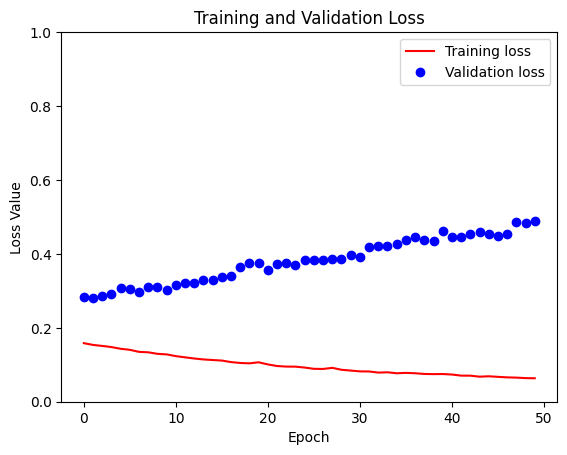

In [43]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure()
plt.plot(model_history.epoch, loss, 'r', label='Training loss')
plt.plot(model_history.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

## Make predictions

Now, make some predictions. In the interest of saving time, the number of epochs was kept small, but you may set this higher to achieve more accurate results.

2/2 [==============================] - 0s 43ms/step


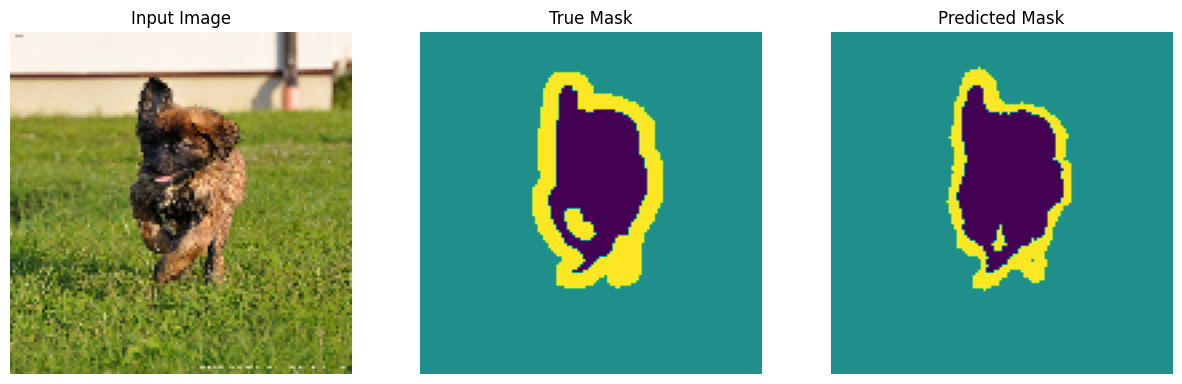

2/2 [==============================] - 0s 45ms/step


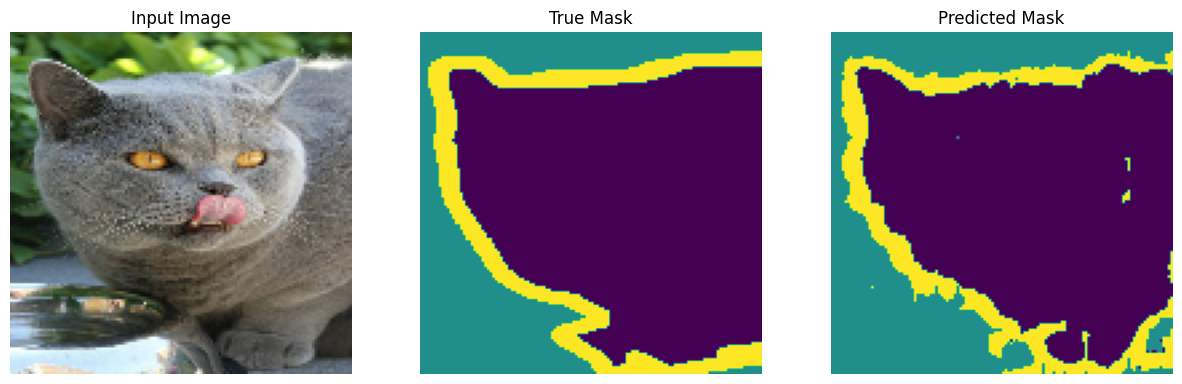

2/2 [==============================] - 0s 43ms/step


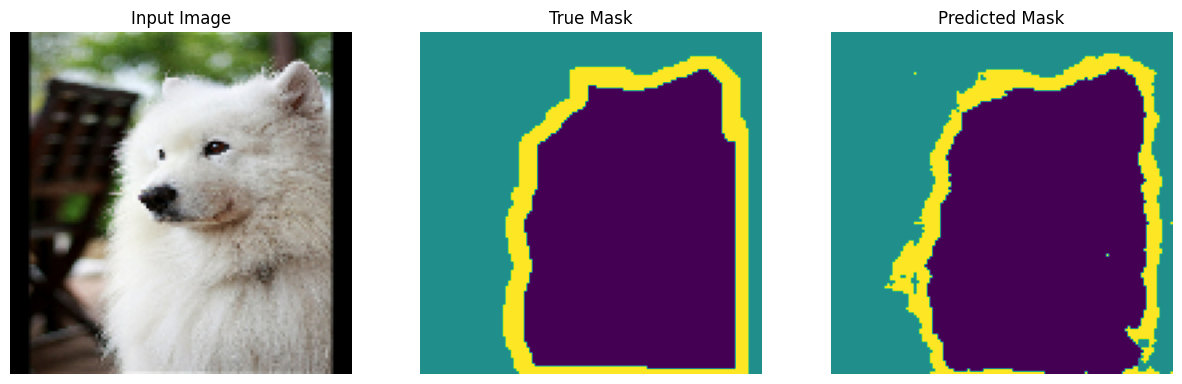

In [44]:
show_predictions(test_batches, 3)